In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn.apionly as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
mpl.rcParams['figure.dpi'] = 120  # make plots bigger by default
from collections import defaultdict
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import datasets

# Step 0: Import Data
Process Data to make it more readable and clean

In [88]:
# First Import data into DataFrame to make it easier to use
data = pd.read_csv("wdbc.data",header = None)

# Next we add the appropriate column names based on "wdbc.names"
data.columns = ["ID","Diagnosis","Mean Radius","Mean Texture","Mean Perimeter","Mean Area","Mean Smoothness","Mean Compactness",
                "Mean Concavity","Mean Concave Points","Mean Symmetry","Mean Fractal Dimension","Radius SE", "Textture SE","Perimeter SE","Area SE","Smootheness Se"
               ,"Compactness SE","Concavity SE","Concave Points SE","Symmetry SE","Fractal Dimension SE", "Worst Radius","Worst Texture","Worst Perimeter","Worst Area",
               "Worst Smoothness", "Worst Compactness", "Worst Concavity","Worst Concave Points","Worst Symmetry","Worst Fractial Dimension"]


In [89]:
# outputing the first few lines of the dataframe
data.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractial Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Step 1: Finish Preparing Matrix
Display initial plot to show what could possibly be defining cause of the Malignant Tumors

Text(0,0.5,'Mean Radius')

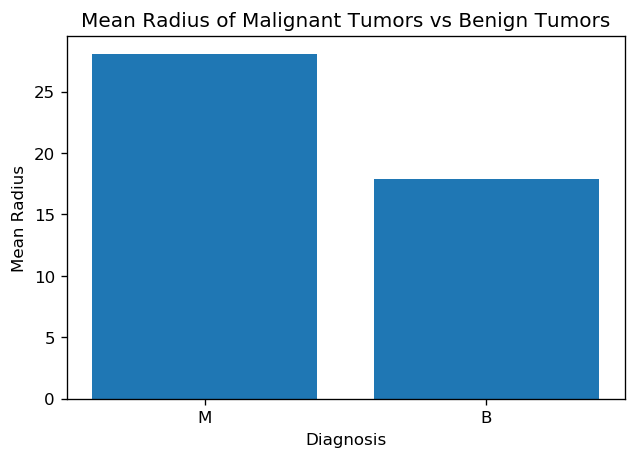

In [91]:
# Plot a possible correlation for possible factor that causes tumors to be diagnosed as either
# malignant or benign
plt.bar(data["Diagnosis"],data["Mean Radius"])
plt.title("Mean Radius of Malignant Tumors vs Benign Tumors")
plt.xlabel("Diagnosis")
plt.ylabel("Mean Radius")